# Final Project Employee Turnover
### Assessing employee_churn_data, sourced via Kaggle, (https://www.kaggle.com/datasets/marikastewart/employee-turnover) 
### Explore what factors influence the rate of employee turnover at this particular business between the years 2016-2020. Data was gathered by the HR Department on almost 10,000 employees, and comes from employee exit interviews, performance reviews and employee records.


 ## Analysis' used:
 ### Will run Binary Logistic Regressions for most columns, but will run independent Chi-Square test for "salary" and "department" columns (as they are the only 2 with categorical IVs).
 ### Single Correlations and correlation matrix 
 ### NOTE: Some of this will be run in RStudio


## Install packages

In [330]:
!pip3 install pandas

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [331]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
import statsmodels.stats.api as sms
import statsmodels.api as sm
from scipy.stats import boxcox
import matplotlib.mlab as mlab
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Import dataset

#### Will be assessing this dataset to discover if the employee high turnover rate is related to these factors: salary, satisfaction, avg_hrs_month and tenure.

In [332]:
EmployeeTurnover = pd.read_csv('/Users/dorothycouch/employee_churn_data.csv')

## Explore data


In [379]:
## Check for null data and view
EmployeeTurnover.isnull().sum()

EmployeeTurnover.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [380]:
# Investigate all the elements whithin each Feature 

for column in EmployeeTurnover:
    unique_values = np.unique(EmployeeTurnover[column])
    nr_values = len(unique_values)
    if nr_values <= 15:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature department is: 10 -- ['IT' 'admin' 'engineering' 'finance' 'logistics' 'marketing' 'operations'
 'retail' 'sales' 'support']
The number of values for feature promoted is: 2 -- [0 1]
The number of values for feature review is: 9540
The number of values for feature projects is: 4 -- [2 3 4 5]
The number of values for feature salary is: 3 -- ['high' 'low' 'medium']
The number of values for feature tenure is: 11 -- [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
The number of values for feature satisfaction is: 9540
The number of values for feature bonus is: 2 -- [0 1]
The number of values for feature avg_hrs_month is: 9540
The number of values for feature left is: 2 -- ['no' 'yes']


In [179]:
EmployeeTurnover.value_counts()

department  promoted  review    projects  salary  tenure  satisfaction  bonus  avg_hrs_month  left
IT          0         0.422341  2         medium  7.0     0.675074      0      185.961653     yes     1
retail      0         0.682669  4         medium  8.0     0.588426      0      188.028915     yes     1
                      0.682845  3         medium  7.0     0.511525      0      184.976643     no      1
                      0.682915  2         medium  5.0     0.563172      0      180.026543     no      1
                      0.683070  3         medium  6.0     0.619241      0      183.190667     no      1
                                                                                                     ..
marketing   0         0.573528  3         low     7.0     0.378499      1      185.808098     no      1
                      0.573754  4         high    5.0     0.633021      0      181.046253     no      1
                      0.573939  3         medium  6.0     0.722729   

In [180]:
EmployeeTurnover.columns

Index(['department', 'promoted', 'review', 'projects', 'salary', 'tenure',
       'satisfaction', 'bonus', 'avg_hrs_month', 'left'],
      dtype='object')

In [181]:
EmployeeTurnover.satisfaction.describe()

count    9540.000000
mean        0.504645
std         0.158555
min         0.000000
25%         0.386801
50%         0.500786
75%         0.622607
max         1.000000
Name: satisfaction, dtype: float64

In [182]:
EmployeeTurnover.salary.describe()

count       9540
unique         3
top       medium
freq        6611
Name: salary, dtype: object

In [183]:
EmployeeTurnover.avg_hrs_month.describe()

count    9540.000000
mean      184.661571
std         4.144831
min       171.374060
25%       181.472085
50%       184.628796
75%       187.728708
max       200.861656
Name: avg_hrs_month, dtype: float64

# Data wrangling: 

## Recoding Columns
### Keeping columns and recoding: "left" to 0/1, "salary" low-0/medium-1/high-2, and "department".

In [184]:
Emp_Turn = EmployeeTurnover[['department', 'salary', 'satisfaction', 'avg_hrs_month', 'left', 'tenure']]


In [185]:
Emp_Turn.head()

,department,salary,satisfaction,avg_hrs_month,left,tenure
0,operations,low,0.626759,180.866070,no,5.0
1,operations,medium,0.443679,182.708149,no,6.0
2,support,medium,0.446823,184.416084,no,6.0
3,logistics,high,0.440139,188.707545,no,8.0
4,sales,high,0.577607,179.821083,no,5.0


In [188]:
Emp_Turn.tail()

,department,salary,satisfaction,avg_hrs_month,left,tenure
9535,operations,medium,0.543641,188.155738,yes,8.0
9536,logistics,medium,0.549048,188.176164,yes,8.0
9537,operations,low,0.705425,186.531008,yes,7.0
9538,IT,medium,0.607287,187.641370,yes,8.0
9539,finance,low,0.706455,185.920934,yes,7.0


In [189]:
Emp_Turn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   salary         9540 non-null   object 
 2   satisfaction   9540 non-null   float64
 3   avg_hrs_month  9540 non-null   float64
 4   left           9540 non-null   object 
 5   tenure         9540 non-null   float64
dtypes: float64(3), object(3)
memory usage: 447.3+ KB


## Recoding "left" column to 1/0:


In [215]:
Emp_Turn_Replaced = Emp_Turn.replace({'left': {'yes': 1, 'no': 0}})


In [216]:
Emp_Turn_Replaced

,department,salary,satisfaction,avg_hrs_month,left,tenure
0,operations,low,0.626759,180.866070,0,5.0
1,operations,medium,0.443679,182.708149,0,6.0
2,support,medium,0.446823,184.416084,0,6.0
3,logistics,high,0.440139,188.707545,0,8.0
4,sales,high,0.577607,179.821083,0,5.0
...,...,...,...,...,...,...
9535,operations,medium,0.543641,188.155738,1,8.0
9536,logistics,medium,0.549048,188.176164,1,8.0
9537,operations,low,0.705425,186.531008,1,7.0
9538,IT,medium,0.607287,187.641370,1,8.0


## Recode "salary" column

In [217]:
def my_recode(salary):
    if salary == "low":
        return 0
    if salary == "medium":
        return 1
    if salary == "high":
        return 2


In [218]:
Emp_Turn_Replaced['SalaryR'] = Emp_Turn_Replaced['salary'].apply(my_recode)
Emp_Turn_Replaced.head()


,department,salary,satisfaction,avg_hrs_month,left,tenure,SalaryR
0,operations,low,0.626759,180.866070,0,5.0,0
1,operations,medium,0.443679,182.708149,0,6.0,1
2,support,medium,0.446823,184.416084,0,6.0,1
3,logistics,high,0.440139,188.707545,0,8.0,2
4,sales,high,0.577607,179.821083,0,5.0,2


In [221]:
Emp_Turn_Replaced

,department,salary,satisfaction,avg_hrs_month,left,tenure,SalaryR
0,operations,low,0.626759,180.866070,0,5.0,0
1,operations,medium,0.443679,182.708149,0,6.0,1
2,support,medium,0.446823,184.416084,0,6.0,1
3,logistics,high,0.440139,188.707545,0,8.0,2
4,sales,high,0.577607,179.821083,0,5.0,2
...,...,...,...,...,...,...,...
9535,operations,medium,0.543641,188.155738,1,8.0,1
9536,logistics,medium,0.549048,188.176164,1,8.0,1
9537,operations,low,0.705425,186.531008,1,7.0,0
9538,IT,medium,0.607287,187.641370,1,8.0,1


## Recode "department" column

In [233]:
Emp_Turn_Replaced.department.value_counts()

sales          1883
retail         1541
operations     1522
engineering    1516
marketing       802
support         735
admin           423
finance         402
logistics       360
IT              356
Name: department, dtype: int64

In [236]:
def my_recode2(department):
    if department == "admin":
        return 0
    if department == "engineering":
        return 1
    if department == "finance":
        return 2
    if department == "IT":
        return 3
    if department == "logistics":
        return 4
    if department == "marketing":
        return 5
    if department == "operations":
        return 6
    if department == "retail":
        return 7
    if department == "sales":
        return 8
    if department == "support":
        return 9

In [406]:
## Apply and view
Emp_Turn_Replaced['DeptR'] = Emp_Turn_Replaced['department'].apply(my_recode2)
Emp_Turn_Replaced.head()

,department,salary,satisfaction,avg_hrs_month,left,tenure,SalaryR,DeptR
0,operations,low,0.626759,180.866070,0,5.0,0,6
1,operations,medium,0.443679,182.708149,0,6.0,1,6
2,support,medium,0.446823,184.416084,0,6.0,1,9
3,logistics,high,0.440139,188.707545,0,8.0,2,4
4,sales,high,0.577607,179.821083,0,5.0,2,8


In [239]:
Emp_Turn_Replaced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   salary         9540 non-null   object 
 2   satisfaction   9540 non-null   float64
 3   avg_hrs_month  9540 non-null   float64
 4   left           9540 non-null   int64  
 5   tenure         9540 non-null   float64
 6   SalaryR        9540 non-null   int64  
 7   DeptR          9540 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 596.4+ KB


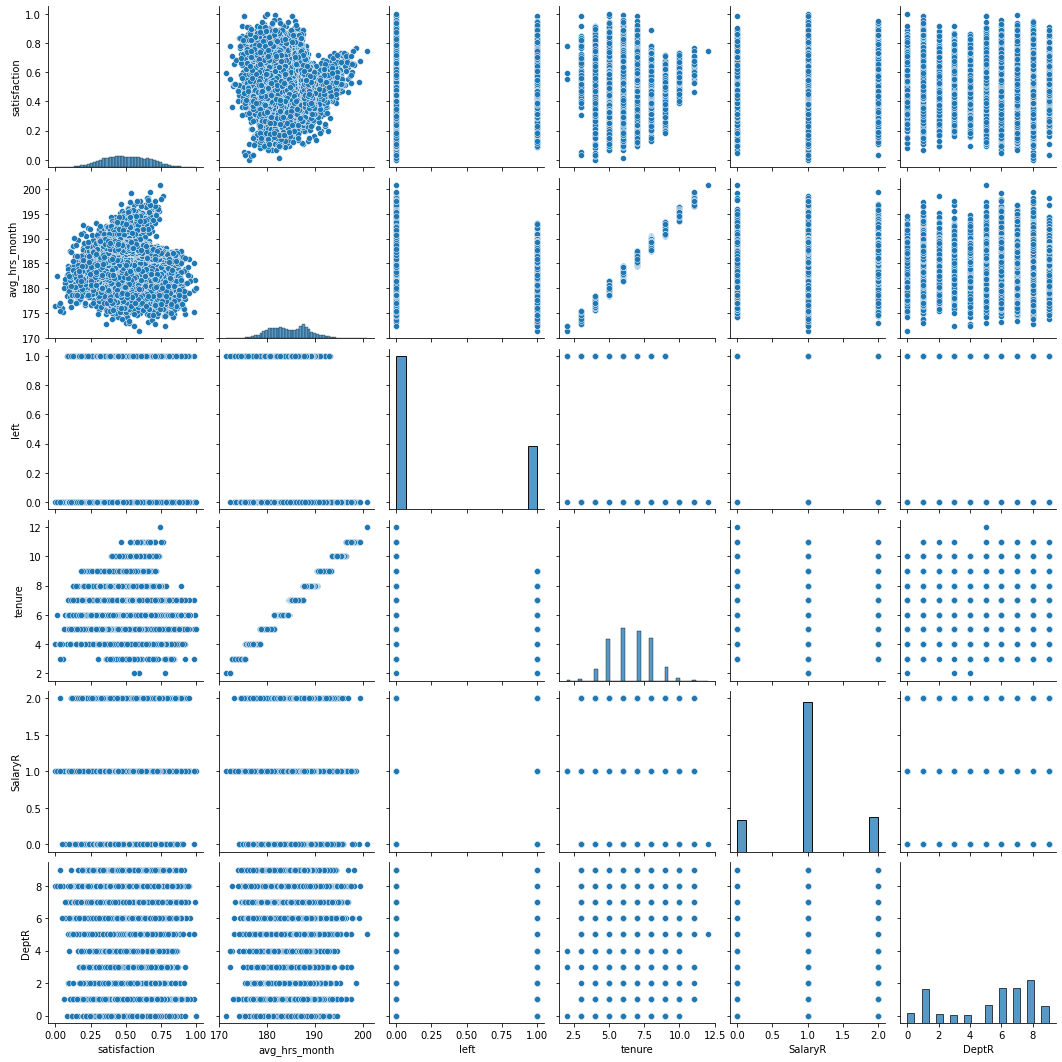

In [382]:
# visualize current data
ETView = sns.pairplot(Emp_Turn_Replaced)


## Histogram

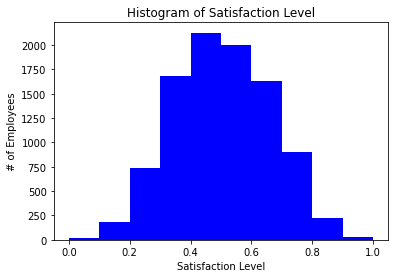

In [407]:
num_bins = 10
n, bins, patches = plt.hist(Emp_Turn_Replaced['satisfaction'], num_bins, facecolor='blue', alpha=1)
plt.xlabel('Satisfaction Level')
plt.ylabel('# of Employees')
plt.title('Histogram of Satisfaction Level')
plt.show()

### NOTE: The highest satisfaction level represented is in the mid ranges of .4-.6. with over 2000 employees in this range. 

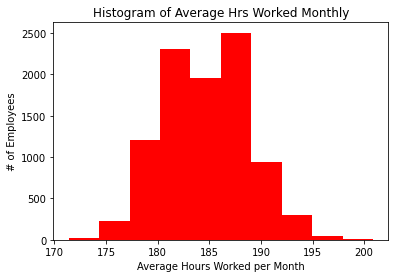

In [408]:
num_bins = 10
n, bins, patches = plt.hist(Emp_Turn_Replaced['avg_hrs_month'], num_bins, facecolor='red', alpha=1)
plt.xlabel('Average Hours Worked per Month')
plt.ylabel('# of Employees')
plt.title('Histogram of Average Hrs Worked Monthly')
plt.show()

### NOTE: Highest number of average hours worked in a month falls between 185-190, with 2000-2400 employees falling in these ranges.



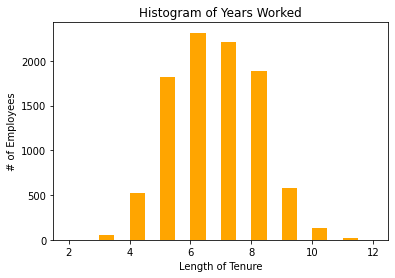

In [409]:
num_bins = 20
n, bins, patches = plt.hist(Emp_Turn_Replaced['tenure'], num_bins, facecolor='orange', alpha=1)
plt.xlabel('Length of Tenure')
plt.ylabel('# of Employees')
plt.title('Histogram of Years Worked')
plt.show()

### NOTE: The highest number of employees fall into the just over 6 years tenure with the company, closely followed by those who have worked with this company for around 7 and then 8 years. SO the the majority of the employees in this data set seem to fall in the 5-8 years range of tenure.


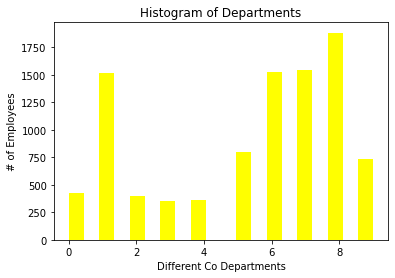

In [410]:
num_bins = 20
n, bins, patches = plt.hist(Emp_Turn_Replaced['DeptR'], num_bins, facecolor='yellow', alpha=1)
plt.xlabel('Different Co Departments')
plt.ylabel('# of Employees')
plt.title('Histogram of Departments')
plt.show()

### Run value counts to help interpret 'department' histogram

In [259]:
Emp_Turn_Replaced.department.value_counts()


sales          1883
retail         1541
operations     1522
engineering    1516
marketing       802
support         735
admin           423
finance         402
logistics       360
IT              356
Name: department, dtype: int64

In [260]:
Emp_Turn_Replaced.DeptR.value_counts()


8    1883
7    1541
6    1522
1    1516
5     802
9     735
0     423
2     402
4     360
3     356
Name: DeptR, dtype: int64

### NOTE: Highest number of employees in sales, retail, operations and engineering departments, with the lowest # of employees in the IT department.

## Bar chart for 'salary'

Text(0, 0.5, '# of Employees')

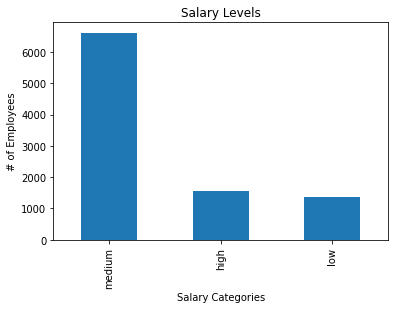

In [411]:
Salary2 = Emp_Turn_Replaced['salary'].value_counts().plot(kind='bar')
Salary2.set_title("Salary Levels")
Salary2.set_xlabel("Salary Categories")
Salary2.set_ylabel("# of Employees")

### NOTE: Highest number of employees pay rates fall in the medium range.

## Bar chart for 'department'

Text(0, 0.5, '# of Employees')

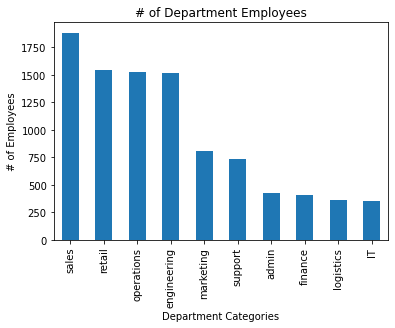

In [412]:
Dept2 = Emp_Turn_Replaced['department'].value_counts().plot(kind='bar')
Dept2.set_title("# of Department Employees")
Dept2.set_xlabel("Department Categories")
Dept2.set_ylabel("# of Employees")

### NOTE: The sales dept has the highest number of employees, followed by retail, operations and engineering.
### Also of note: Scatterplot NOT a good option

## Independent Chi-Square with Salary Column
### Hypothesis: There is relationship between salary and employee's decision to stay/go.
### Null Hypothesis: There is no relationship between salaray level and employee's retention.
### Create a Contingency Table
### Test Assumptions and Run the Analysis 
#### The first thing, before running independent Chi-Square analysis: create a contingency table.


In [303]:
Emp_Turn_R_Crosstab = pd.crosstab(Emp_Turn_Replaced['left'], Emp_Turn_Replaced['salary'])


In [304]:

Emp_Turn_R_Crosstab

salary,high,low,medium
left,,,
0,1106,990,4660
1,442,391,1951


In [305]:
Emp_Turn_Replaced

,department,salary,satisfaction,avg_hrs_month,left,tenure,SalaryR,DeptR
0,operations,low,0.626759,180.866070,0,5.0,0,6
1,operations,medium,0.443679,182.708149,0,6.0,1,6
2,support,medium,0.446823,184.416084,0,6.0,1,9
3,logistics,high,0.440139,188.707545,0,8.0,2,4
4,sales,high,0.577607,179.821083,0,5.0,2,8
...,...,...,...,...,...,...,...,...
9535,operations,medium,0.543641,188.155738,1,8.0,1,6
9536,logistics,medium,0.549048,188.176164,1,8.0,1,4
9537,operations,low,0.705425,186.531008,1,7.0,0,6
9538,IT,medium,0.607287,187.641370,1,8.0,1,3


In [306]:
Emp_Turn_Replaced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   salary         9540 non-null   object 
 2   satisfaction   9540 non-null   float64
 3   avg_hrs_month  9540 non-null   float64
 4   left           9540 non-null   int64  
 5   tenure         9540 non-null   float64
 6   SalaryR        9540 non-null   int64  
 7   DeptR          9540 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 596.4+ KB


## Running the Independent Chi-Square


In [413]:
##Once the contingency table is made, then run the function stats.chi2_contingency on the contingency table created:
stats.chi2_contingency(Emp_Turn_R_Crosstab)


(1.1483611437561942,
 0.5631661539699939,
 2,
 array([[1096.25660377,  977.99119497, 4681.75220126],
        [ 451.74339623,  403.00880503, 1929.24779874]]))

### 1st number is Chi-Square statistic, second# is p-value associated with chi-square statistic, last is array-which has numbers all over, indicating 'salary' and 'left' do not have any significant relationship.
### Assumption met of the minimum # of 5 samples per cell. 
## RESULTS of Chi-Square test indicate the salary level is not related to whether the employee leaves the company or not. (This suprised me-not what I expected)
### So we reject the alternative hypothesis that salary affects the employee's staying or going-and we accept the null hypothesis.

## Run single correlations


In [279]:
Emp_Turn_Replaced['satisfaction'].corr(Emp_Turn_Replaced['tenure'])


-0.14624644316489163

In [280]:
Emp_Turn_Replaced['satisfaction'].corr(Emp_Turn_Replaced['avg_hrs_month'])


-0.14314181656853991

In [398]:
Emp_Turn_Replaced['avg_hrs_month'].corr(Emp_Turn_Replaced['tenure'])


0.9786178937225353

In [383]:
Emp_Turn_Replaced['SalaryR'].corr(Emp_Turn_Replaced['tenure'])


0.005097269987879844

In [384]:
Emp_Turn_Replaced['DeptR'].corr(Emp_Turn_Replaced['tenure'])


0.008386433359757604

In [388]:
Emp_Turn_Replaced['SalaryR'].corr(Emp_Turn_Replaced['left'])


0.000943188481150833

In [393]:
Emp_Turn_Replaced['DeptR'].corr(Emp_Turn_Replaced['left'])


0.0033177583616279217

In [394]:
Emp_Turn_Replaced['satisfaction'].corr(Emp_Turn_Replaced['left'])


-0.009720701331017491

In [395]:
Emp_Turn_Replaced['tenure'].corr(Emp_Turn_Replaced['left'])


0.010521277202601645

In [397]:
Emp_Turn_Replaced['avg_hrs_month'].corr(Emp_Turn_Replaced['left'])


0.009007855568643145

In [399]:
Emp_Turn_Replaced['avg_hrs_month'].corr(Emp_Turn_Replaced['satisfaction'])


-0.1431418165685399

In [400]:
Emp_Turn_Replaced['tenure'].corr(Emp_Turn_Replaced['satisfaction'])


-0.14624644316489163

### Note: The 97% results indicates there is a strong relationship between employee's tenure and average hours worked in a month. 
### Also, avg_hrs_month and tenure both are slightly correlated to employee satisfaction by a tiny amount at 14%, which seems so small, but all the other variables show as less than 1%. Tenure comes in at a 1% correlation to the "left" column.

## Create Correlation Matrix
### Drop non-continuous data


In [282]:
Emp_Turn_DROP = Emp_Turn_Replaced.drop(['salary', 'department'], axis=1)


In [283]:
Emp_Turn_DROP

,satisfaction,avg_hrs_month,left,tenure,SalaryR,DeptR
0,0.626759,180.866070,0,5.0,0,6
1,0.443679,182.708149,0,6.0,1,6
2,0.446823,184.416084,0,6.0,1,9
3,0.440139,188.707545,0,8.0,2,4
4,0.577607,179.821083,0,5.0,2,8
...,...,...,...,...,...,...
9535,0.543641,188.155738,1,8.0,1,6
9536,0.549048,188.176164,1,8.0,1,4
9537,0.705425,186.531008,1,7.0,0,6
9538,0.607287,187.641370,1,8.0,1,3


### Run correlation matrix on Emp_Turn_DROP dataset

In [309]:
Emp_Turn_DROP.corr(method='pearson')


,satisfaction,avg_hrs_month,left,tenure,SalaryR,DeptR
satisfaction,1.000000,-0.143142,-0.009721,-0.146246,-0.004510,-0.006741
avg_hrs_month,-0.143142,1.000000,0.009008,0.978618,0.007697,0.004321
left,-0.009721,0.009008,1.000000,0.010521,0.000943,0.003318
tenure,-0.146246,0.978618,0.010521,1.000000,0.005097,0.008386
SalaryR,-0.004510,0.007697,0.000943,0.005097,1.000000,-0.004423
DeptR,-0.006741,0.004321,0.003318,0.008386,-0.004423,1.000000


In [414]:
Emp_Turn_DROP.corr()

,satisfaction,avg_hrs_month,left,tenure,SalaryR,DeptR
satisfaction,1.000000,-0.143142,-0.009721,-0.146246,-0.004510,-0.006741
avg_hrs_month,-0.143142,1.000000,0.009008,0.978618,0.007697,0.004321
left,-0.009721,0.009008,1.000000,0.010521,0.000943,0.003318
tenure,-0.146246,0.978618,0.010521,1.000000,0.005097,0.008386
SalaryR,-0.004510,0.007697,0.000943,0.005097,1.000000,-0.004423
DeptR,-0.006741,0.004321,0.003318,0.008386,-0.004423,1.000000


In [441]:
Emp_Turn_DROP.corr(method='kendall').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


,satisfaction,avg_hrs_month,left,tenure,SalaryR,DeptR
satisfaction,1.0,-0.1,-0.013,-0.11,-0.0054,-0.002
avg_hrs_month,-0.1,1.0,0.035,0.9,0.0052,0.00094
left,-0.013,0.035,1.0,0.039,0.00082,0.00062
tenure,-0.11,0.9,0.039,1.0,0.0034,0.0036
SalaryR,-0.0054,0.0052,0.00082,0.0034,1.0,-0.0005
DeptR,-0.002,0.00094,0.00062,0.0036,-0.0005,1.0


### NOTE: Looks like tenure and avg_hrs_month are the only two columns/variables with any significant relation.

In [ ]:
## Tenure and Average hours worked monthly....

# Make IV/DV into dataframes & Run logistic regression(s)

In [318]:
x = Emp_Turn_DROP['DeptR']
y = Emp_Turn_DROP['left']

In [319]:
logit = sm.Logit(y,x)
results = logit.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.623703
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.033    
Dependent Variable: left             AIC:              11902.2523
Date:               2022-09-05 19:59 BIC:              11909.4156
No. Observations:   9540             Log-Likelihood:   -5950.1   
Df Model:           0                LL-Null:          -5760.0   
Df Residuals:       9539             LLR p-value:      nan       
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
DeptR    -0.1316     0.0038   -34.4020   0.0000   -0.1391   -0.1241



## RESULTS1: 
### P>|z| column indicates, the department the employee works in, is not a significant influence on employee retention. Also Pseudo R-squared # indicates DeptR explains less than 3%  of the variance of an employee staying or leaving.

In [320]:
x = Emp_Turn_DROP['satisfaction']
y = Emp_Turn_DROP['left']

In [321]:
logit = sm.Logit(y,x)
results = logit.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.610104
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.010    
Dependent Variable: left             AIC:              11642.7862
Date:               2022-09-05 20:07 BIC:              11649.9495
No. Observations:   9540             Log-Likelihood:   -5820.4   
Df Model:           0                LL-Null:          -5760.0   
Df Residuals:       9539             LLR p-value:      nan       
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
satisfaction     -1.6340   0.0435 -37.5509 0.0000 -1.7193 -1.5488



## Results2:
### P>|z| column indicates job satisfaction is not a significant influence on employee retention. Also Pseudo R-squared # indicates job satisfaction explains less than 1% of the variance of an employee staying or leaving.

In [326]:
x = Emp_Turn_DROP['avg_hrs_month']
y = Emp_Turn_DROP['left']

In [327]:
logit = sm.Logit(y,x)
results = logit.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.603899
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.000    
Dependent Variable: left             AIC:              11524.3933
Date:               2022-09-05 20:13 BIC:              11531.5565
No. Observations:   9540             Log-Likelihood:   -5761.2   
Df Model:           0                LL-Null:          -5760.0   
Df Residuals:       9539             LLR p-value:      nan       
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
avg_hrs_month    -0.0048   0.0001 -39.3369 0.0000 -0.0050 -0.0046



## Results3:
### P>|z| column indicates, average hours worked per month, is not a significant influence on employee retention. Also Pseudo R-squared # indicates satisfaction explains 0% of the variance of an employee staying or leaving.

In [328]:
x = Emp_Turn_DROP['tenure']
y = Emp_Turn_DROP['left']

In [329]:
logit = sm.Logit(y,x)
results = logit.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.608309
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.008    
Dependent Variable: left             AIC:              11608.5323
Date:               2022-09-05 20:17 BIC:              11615.6956
No. Observations:   9540             Log-Likelihood:   -5803.3   
Df Model:           0                LL-Null:          -5760.0   
Df Residuals:       9539             LLR p-value:      nan       
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
tenure   -0.1295     0.0034   -38.1727   0.0000   -0.1361   -0.1228



## Results4:
### P>|z| column indicates tenure is not a significant influence on employee retention. Also Pseudo R-squared # indicates tenure explains less than 1% of the variance of an employee staying or leaving.

#### For decision Tree and Random Forest
#### Specify x and y variables using subsetting. y is the column you are predicting, and x is everything you are using to predict it.

# Data Wrangling 2 with new portion of data: review, promoted, projects and bonus 
### Assessing these other variables to see if they're influential factors as analysis results to this point seem insuffient for the high employee turnover rate.

## Re load dataset

In [344]:
EmployeeTurnover2 = pd.read_csv('/Users/dorothycouch/employee_churn_data.csv')

In [345]:
EmployeeTurnover2.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


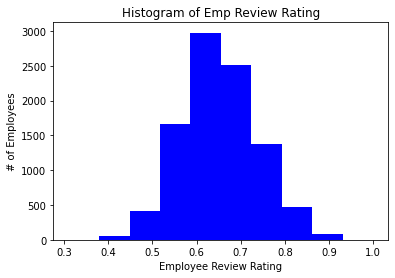

In [430]:
num_bins = 10
n, bins, patches = plt.hist(EmployeeTurnover2['review'], num_bins, facecolor='blue', alpha=1)
plt.xlabel('Employee Review Rating')
plt.ylabel('# of Employees')
plt.title('Histogram of Emp Review Rating')
plt.show()

### NOTE: The majority of the employees have received midrange level reviews, falling between .6 and .7.

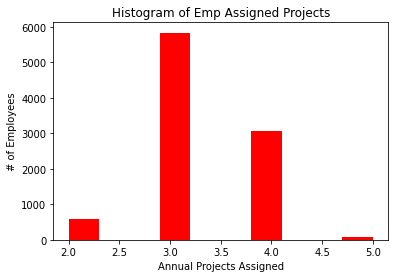

In [431]:
num_bins = 10
n, bins, patches = plt.hist(EmployeeTurnover2['projects'], num_bins, facecolor='red', alpha=1)
plt.xlabel('Annual Projects Assigned')
plt.ylabel('# of Employees')
plt.title('Histogram of Emp Assigned Projects')
plt.show()

### NOTE: Highest number of assigned annual projects: 3. With almost 6000 employees being assigned 3 projects annually, followed by just over 3000 employees being assigned 4 annual projects, then less than 1000 employees receiving 2 assigned projects annually.

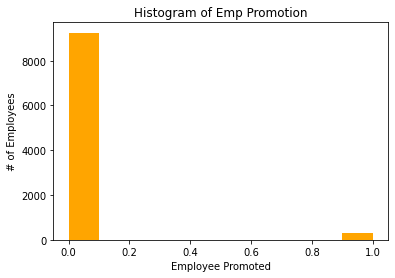

In [432]:
num_bins = 10
n, bins, patches = plt.hist(EmployeeTurnover2['promoted'], num_bins, facecolor='orange', alpha=1)
plt.xlabel('Employee Promoted')
plt.ylabel('# of Employees')
plt.title('Histogram of Emp Promotion')
plt.show()

### NOTE: The majority of employees have not received a promotion, with less than 1000 having received a promotion.

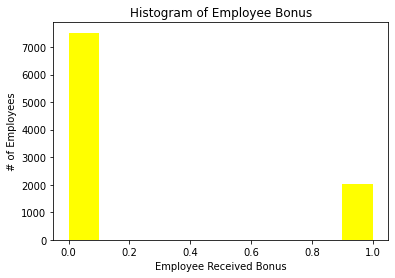

In [433]:
num_bins = 10
n, bins, patches = plt.hist(EmployeeTurnover2['bonus'], num_bins, facecolor='yellow', alpha=1)
plt.xlabel('Employee Received Bonus')
plt.ylabel('# of Employees')
plt.title('Histogram of Employee Bonus')
plt.show()

### NOTE: Just over 2000 employees received bonuses.

## Data Wrangling 2
### Keep columns, recode 'left'

In [359]:
Emp_Turn2 = EmployeeTurnover[['review', 'projects', 'promoted', 'bonus', 'left']]


In [360]:
Emp_Turn2

,review,projects,promoted,bonus,left
0,0.577569,3,0,0,no
1,0.751900,3,0,0,no
2,0.722548,3,0,0,no
3,0.675158,4,0,0,no
4,0.676203,3,0,1,no
...,...,...,...,...,...
9535,0.610988,4,0,0,yes
9536,0.746887,3,0,0,yes
9537,0.557980,3,0,0,yes
9538,0.584446,4,0,1,yes


In [361]:
Emp_Turn_Replaced2 = Emp_Turn2.replace({'left': {'yes': 1, 'no': 0}})


In [362]:
Emp_Turn_Replaced2

,review,projects,promoted,bonus,left
0,0.577569,3,0,0,0
1,0.751900,3,0,0,0
2,0.722548,3,0,0,0
3,0.675158,4,0,0,0
4,0.676203,3,0,1,0
...,...,...,...,...,...
9535,0.610988,4,0,0,1
9536,0.746887,3,0,0,1
9537,0.557980,3,0,0,1
9538,0.584446,4,0,1,1


## Run correlation on newest datasat Emp_Turn_Replaced2

In [416]:
## Run Correlation matrix on new dataset
Emp_Turn_Replaced2.corr()

,review,projects,promoted,bonus,left
review,1.000000,0.000219,0.001879,-0.003627,0.304294
projects,0.000219,1.000000,0.010107,0.002654,-0.012408
promoted,0.001879,0.010107,1.000000,0.001072,-0.036777
bonus,-0.003627,0.002654,0.001072,1.000000,-0.011485
left,0.304294,-0.012408,-0.036777,-0.011485,1.000000


In [404]:
Emp_Turn_Replaced2.corr(method='kendall').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


,review,projects,promoted,bonus,left
review,1.0,0.00092,0.0022,-0.0018,0.23
projects,0.00092,1.0,0.0081,0.003,-0.012
promoted,0.0022,0.0081,1.0,0.0011,-0.037
bonus,-0.0018,0.003,0.0011,1.0,-0.011
left,0.23,-0.012,-0.037,-0.011,1.0


In [419]:
##Variables on 2nd data set do not seem correlated



## Run Logistic Regressions on 2nd dataset Emp_Turn_Replaced2

In [363]:
x = Emp_Turn_Replaced2['review']
y = Emp_Turn_Replaced2['left']

In [364]:
logit = sm.Logit(y,x)
results = logit.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.620198
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.027    
Dependent Variable: left             AIC:              11835.3815
Date:               2022-09-09 13:16 BIC:              11842.5448
No. Observations:   9540             Log-Likelihood:   -5916.7   
Df Model:           0                LL-Null:          -5760.0   
Df Residuals:       9539             LLR p-value:      nan       
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
review   -1.2104     0.0338   -35.8105   0.0000   -1.2767   -1.1442



## Results1:
### P>|z| column indicates 'review' is not a significant influence on employee retention. 
### Also Pseudo R-squared # indicates 'review' explains less than 1% of the variance of an employee staying or leaving.

In [365]:
x = Emp_Turn_Replaced2['projects']
y = Emp_Turn_Replaced2['left']

In [366]:
logit = sm.Logit(y,x)
results = logit.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.605390
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.003    
Dependent Variable: left             AIC:              11552.8465
Date:               2022-09-09 13:17 BIC:              11560.0098
No. Observations:   9540             Log-Likelihood:   -5775.4   
Df Model:           0                LL-Null:          -5760.0   
Df Residuals:       9539             LLR p-value:      nan       
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
projects     -0.2654    0.0068  -38.8423  0.0000  -0.2788  -0.2520



## Results2:
### P>|z| column indicates 'projects' is not a significant influence on employee retention.
### Also Pseudo R-squared # indicates 'projects' explains less than 1% of the variance of an employee staying or leaving.

In [367]:
x = Emp_Turn_Replaced2['promoted']
y = Emp_Turn_Replaced2['left']

In [368]:
logit = sm.Logit(y,x)
results = logit.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.687191
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.138    
Dependent Variable: left             AIC:              13113.6098
Date:               2022-09-09 13:17 BIC:              13120.7730
No. Observations:   9540             Log-Likelihood:   -6555.8   
Df Model:           0                LL-Null:          -5760.0   
Df Residuals:       9539             LLR p-value:      nan       
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
promoted      -1.4037    0.1478  -9.4952  0.0000  -1.6934  -1.1139



## Results3:
### P>|z| column indicates 'promoted' is not a significant influence on employee retention.
### Also Pseudo R-squared # indicates 'promoted' explains 13% of the variance of an employee staying or leaving.

In [369]:
x = Emp_Turn_Replaced2['bonus']
y = Emp_Turn_Replaced2['left']

In [370]:
logit = sm.Logit(y,x)
results = logit.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.672251
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.113    
Dependent Variable: left             AIC:              12828.5574
Date:               2022-09-09 13:17 BIC:              12835.7206
No. Observations:   9540             Log-Likelihood:   -6413.3   
Df Model:           0                LL-Null:          -5760.0   
Df Residuals:       9539             LLR p-value:      nan       
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
bonus    -0.9357     0.0494   -18.9335   0.0000   -1.0326   -0.8389



## Results4:
### P>|z| column indicates 'bonus' is not a significant influence on employee retention.
### Also Pseudo R-squared # indicates 'bonus' explains 11% of the variance of an employee staying or leaving.